In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data path
data_path = '../data/'

try:
    # Use the 'comment' parameter to skip metadata lines starting with '#'
    df_koi = pd.read_csv(f'{data_path}KOI.csv', comment='#')
    df_toi = pd.read_csv(f'{data_path}TOI.csv', comment='#')
    df_k2 = pd.read_csv(f'{data_path}K2.csv', comment='#')

    # Set visualization styles
    sns.set_style('whitegrid')
    plt.rcParams['figure.figsize'] = (12, 8)

    print("--- Successfully loaded all three datasets ---")
    print(f"KOI Dataset Shape: {df_koi.shape}")
    print(f"TOI Dataset Shape: {df_toi.shape}")
    print(f"K2 Dataset Shape: {df_k2.shape}")

except Exception as e:
    print(f"An unexpected error occurred: {e}")
    print("\nIf the error persists, the issue might be more complex, such as a different comment character or a corrupted file.")

--- Successfully loaded all three datasets ---
KOI Dataset Shape: (9564, 49)
TOI Dataset Shape: (7668, 65)
K2 Dataset Shape: (3992, 94)


In [3]:
# Set pandas display options to ensure we see all columns and rows in summaries
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

print("====================================================================")
print("                           KOI DATASET INFO                         ")
print("====================================================================")
print(f"SHAPE: {df_koi.shape}\n")
df_koi.info(verbose=True, show_counts=True)


print("\n\n====================================================================")
print("                           TOI DATASET INFO                         ")
print("====================================================================")
print(f"SHAPE: {df_toi.shape}\n")
df_toi.info(verbose=True, show_counts=True)


print("\n\n====================================================================")
print("                           K2 DATASET INFO                          ")
print("====================================================================")
print(f"SHAPE: {df_k2.shape}\n")
df_k2.info(verbose=True, show_counts=True)

                           KOI DATASET INFO                         
SHAPE: (9564, 49)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2747 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null

In [4]:
print("--- KOI Target Variable Distribution ---")
print(df_koi['koi_disposition'].value_counts())
print("\n" + "="*40 + "\n")

print("--- TOI Target Variable Distribution ---")
print(df_toi['tfopwg_disp'].value_counts())
print("\n" + "="*40 + "\n")

print("--- K2 Target Variable Distribution ---")
print(df_k2['disposition'].value_counts())

--- KOI Target Variable Distribution ---
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64


--- TOI Target Variable Distribution ---
tfopwg_disp
PC     4675
FP     1192
CP      679
KP      565
APC     459
FA       98
Name: count, dtype: int64


--- K2 Target Variable Distribution ---
disposition
CONFIRMED         2308
CANDIDATE         1369
FALSE POSITIVE     293
REFUTED             22
Name: count, dtype: int64


In [6]:
# --- Step 1: Reload the original data to include 'CANDIDATE' rows ---
# This is necessary because the previous step had already dropped them.
print("--- Reloading original datasets ---")
data_path = '../data/'
df_koi = pd.read_csv(f'{data_path}KOI.csv', comment='#')
df_toi = pd.read_csv(f'{data_path}TOI.csv', comment='#')
df_k2 = pd.read_csv(f'{data_path}K2.csv', comment='#')
print("Data reloaded successfully.\n")


# --- Step 2: Define mappings for a 3-class system ---
# We will map all labels to one of: 'CONFIRMED', 'CANDIDATE', or 'FALSE POSITIVE'
koi_map_multiclass = {
    'CONFIRMED': 'CONFIRMED',
    'CANDIDATE': 'CANDIDATE',
    'FALSE POSITIVE': 'FALSE POSITIVE'
}

toi_map_multiclass = {
    'CP': 'CONFIRMED',
    'KP': 'CONFIRMED',
    'PC': 'CANDIDATE',
    'APC': 'CANDIDATE',
    'FP': 'FALSE POSITIVE',
    'FA': 'FALSE POSITIVE'
}

k2_map_multiclass = {
    'CONFIRMED': 'CONFIRMED',
    'CANDIDATE': 'CANDIDATE',
    'FALSE POSITIVE': 'FALSE POSITIVE',
    'REFUTED': 'FALSE POSITIVE'
}


# --- Step 3: Apply mappings to create a new unified 'disposition' column ---

# KOI
print("--- Processing KOI ---")
df_koi['disposition'] = df_koi['koi_disposition'].map(koi_map_multiclass)
print(df_koi['disposition'].value_counts())
print(f"New KOI shape: {df_koi.shape}\n")

# TOI
print("--- Processing TOI ---")
df_toi['disposition'] = df_toi['tfopwg_disp'].map(toi_map_multiclass)
# Drop any rows that didn't map (if any)
df_toi.dropna(subset=['disposition'], inplace=True)
print(df_toi['disposition'].value_counts())
print(f"New TOI shape: {df_toi.shape}\n")


# K2
print("--- Processing K2 ---")
df_k2['disposition'] = df_k2['disposition'].map(k2_map_multiclass)
df_k2.dropna(subset=['disposition'], inplace=True)
print(df_k2['disposition'].value_counts())
print(f"New K2 shape: {df_k2.shape}")

--- Reloading original datasets ---
Data reloaded successfully.

--- Processing KOI ---
disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64
New KOI shape: (9564, 50)

--- Processing TOI ---
disposition
CANDIDATE         5134
FALSE POSITIVE    1290
CONFIRMED         1244
Name: count, dtype: int64
New TOI shape: (7668, 66)

--- Processing K2 ---
disposition
CONFIRMED         2308
CANDIDATE         1369
FALSE POSITIVE     315
Name: count, dtype: int64
New K2 shape: (3992, 94)


In [7]:
# Define the final, standardized columns we want to keep.
# This list is based on our EDA, selecting for common and powerful features.
final_columns = [
    # Target Variable (now multi-class)
    'disposition',

    # Planetary Parameters
    'period', 'duration', 'depth', 'impact', 'planet_radius', 'equilibrium_temp', 'insolation_flux',

    # Stellar Parameters
    'stellar_temp', 'stellar_gravity', 'stellar_radius',

    # Positional Data
    'ra', 'dec',

    # KOI-specific False Positive Flags
    'fpflag_nt', 'fpflag_ss', 'fpflag_co', 'fpflag_ec',

    # Signal-to-Noise Ratio
    'model_snr'
]

# --- Create Renaming Dictionaries ---
koi_rename_map = {
    'koi_period': 'period',
    'koi_duration': 'duration',
    'koi_depth': 'depth',
    'koi_impact': 'impact',
    'koi_prad': 'planet_radius',
    'koi_teq': 'equilibrium_temp',
    'koi_insol': 'insolation_flux',
    'koi_steff': 'stellar_temp',
    'koi_slogg': 'stellar_gravity',
    'koi_srad': 'stellar_radius',
    'koi_model_snr': 'model_snr',
    'koi_fpflag_nt': 'fpflag_nt',
    'koi_fpflag_ss': 'fpflag_ss',
    'koi_fpflag_co': 'fpflag_co',
    'koi_fpflag_ec': 'fpflag_ec'
}

toi_rename_map = {
    'pl_orbper': 'period',
    'pl_trandurh': 'duration',
    'pl_trandep': 'depth',
    'pl_rade': 'planet_radius',
    'pl_eqt': 'equilibrium_temp',
    'pl_insol': 'insolation_flux',
    'st_teff': 'stellar_temp',
    'st_logg': 'stellar_gravity',
    'st_rad': 'stellar_radius'
}

k2_rename_map = {
    'pl_orbper': 'period',
    'pl_rade': 'planet_radius',
    'pl_eqt': 'equilibrium_temp',
    'pl_insol': 'insolation_flux',
    'st_teff': 'stellar_temp',
    'st_logg': 'stellar_gravity',
    'st_rad': 'stellar_radius'
}

# --- Apply Renaming ---
# Note: We need to drop the *original* disposition columns before renaming to avoid conflicts
df_koi.rename(columns=koi_rename_map, inplace=True)
df_toi.rename(columns=toi_rename_map, inplace=True)
df_k2.rename(columns=k2_rename_map, inplace=True)

# --- Reindex to ensure all dataframes have the same columns ---
# This will add missing columns and fill them with NaN
df_koi_final = df_koi.reindex(columns=final_columns)
df_toi_final = df_toi.reindex(columns=final_columns)
df_k2_final = df_k2.reindex(columns=final_columns)


# --- Concatenate into a single DataFrame ---
df_unified = pd.concat([df_koi_final, df_toi_final, df_k2_final], ignore_index=True)

print("--- Unified Dataset Information ---")
print(f"Successfully unified the datasets.")
print(f"Shape of the final unified dataset: {df_unified.shape}")
print("\nFull info of the unified dataset:")
df_unified.info()

--- Unified Dataset Information ---
Successfully unified the datasets.
Shape of the final unified dataset: (21224, 18)

Full info of the unified dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21224 entries, 0 to 21223
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   disposition       21224 non-null  object 
 1   period            21051 non-null  float64
 2   duration          17232 non-null  float64
 3   depth             16869 non-null  float64
 4   impact            9201 non-null   float64
 5   planet_radius     19514 non-null  float64
 6   equilibrium_temp  17392 non-null  float64
 7   insolation_flux   17353 non-null  float64
 8   stellar_temp      19574 non-null  float64
 9   stellar_gravity   18349 non-null  float64
 10  stellar_radius    20210 non-null  float64
 11  ra                21201 non-null  float64
 12  dec               21201 non-null  float64
 13  fpflag_nt         9564 non-

In [8]:
print("--- Starting final cleaning and imputation ---")

# Step 1: Encode the target variable ('disposition') into numerical format
disposition_map = {'FALSE POSITIVE': 0, 'CANDIDATE': 1, 'CONFIRMED': 2}
df_unified['disposition'] = df_unified['disposition'].map(disposition_map)
print("Step 1: Target variable 'disposition' successfully encoded.")

# Step 2: Fill NaN values in KOI-specific flag columns with 0
fpflag_cols = ['fpflag_nt', 'fpflag_ss', 'fpflag_co', 'fpflag_ec']
df_unified[fpflag_cols] = df_unified[fpflag_cols].fillna(0).astype(int)
print("Step 2: KOI-specific 'fpflag' columns imputed with 0.")

# Step 3: Drop highly sparse columns
columns_to_drop = ['impact', 'model_snr']
df_unified.drop(columns=columns_to_drop, inplace=True)
print(f"Step 3: Dropped highly sparse columns: {columns_to_drop}")

# Step 4: Impute remaining missing numerical data with the median
# Get list of columns that still have nulls
cols_with_nan = df_unified.columns[df_unified.isnull().any()].tolist()
print(f"Step 4: Imputing NaNs with median for columns: {cols_with_nan}")

for col in cols_with_nan:
    median_val = df_unified[col].median()
    df_unified[col].fillna(median_val, inplace=True)

print("Imputation complete.")

# --- Final Verification ---
print("\n--- Final Dataset Verification ---")
print(f"Shape of the final, cleaned dataset: {df_unified.shape}")
print("\nFull info of the cleaned dataset:")
df_unified.info()

--- Starting final cleaning and imputation ---
Step 1: Target variable 'disposition' successfully encoded.
Step 2: KOI-specific 'fpflag' columns imputed with 0.
Step 3: Dropped highly sparse columns: ['impact', 'model_snr']
Step 4: Imputing NaNs with median for columns: ['period', 'duration', 'depth', 'planet_radius', 'equilibrium_temp', 'insolation_flux', 'stellar_temp', 'stellar_gravity', 'stellar_radius', 'ra', 'dec']
Imputation complete.

--- Final Dataset Verification ---
Shape of the final, cleaned dataset: (21224, 16)

Full info of the cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21224 entries, 0 to 21223
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   disposition       21224 non-null  int64  
 1   period            21224 non-null  float64
 2   duration          21224 non-null  float64
 3   depth             21224 non-null  float64
 4   planet_radius     21224 non-null  floa

C:\Users\yvcha\AppData\Local\Temp\ipykernel_4960\4190829105.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_unified[col].fillna(median_val, inplace=True)
C:\Users\yvcha\AppData\Local\Temp\ipykernel_4960\4190829105.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [9]:
from sklearn.model_selection import train_test_split

# --- Step 1: Separate features (X) and target (y) ---
X = df_unified.drop('disposition', axis=1)
y = df_unified['disposition']

# --- Step 2: First split (70% train, 30% temp) ---
# We stratify on y to maintain class distribution
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42, # for reproducibility
    stratify=y
)

# --- Step 3: Second split (15% validation, 15% test from the 30% temp) ---
# We split the temp set 50/50 to get 15% of the original total for each
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42, # for reproducibility
    stratify=y_temp
)

# --- Step 4: Recombine features and target for saving ---
train_df = pd.concat([X_train, y_train], axis=1)
validation_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# --- Step 5: Verify the shapes ---
print("--- Data Splitting Complete ---")
print(f"Total observations: {len(df_unified)}")
print(f"Training set shape:   {train_df.shape} (~{len(train_df)/len(df_unified):.0%})")
print(f"Validation set shape: {validation_df.shape} (~{len(validation_df)/len(df_unified):.0%})")
print(f"Test set shape:       {test_df.shape} (~{len(test_df)/len(df_unified):.0%})")


# --- Step 6: Save the files to disk ---
output_path = '../' # Save to the root 'Exoforge' directory
train_df.to_csv(f'{output_path}unified_train.csv', index=False)
validation_df.to_csv(f'{output_path}unified_validation.csv', index=False)
test_df.to_csv(f'{output_path}unified_test.csv', index=False)

print("\n--- Files Saved Successfully ---")
print(f"1. unified_train.csv")
print(f"2. unified_validation.csv")
print(f"3. unified_test.csv")
print(f"\nThese files are now available in your project's root directory and are ready for model training.")

--- Data Splitting Complete ---
Total observations: 21224
Training set shape:   (14856, 16) (~70%)
Validation set shape: (3184, 16) (~15%)
Test set shape:       (3184, 16) (~15%)

--- Files Saved Successfully ---
1. unified_train.csv
2. unified_validation.csv
3. unified_test.csv

These files are now available in your project's root directory and are ready for model training.


--- Statistical Summary of the Training Data ---


,count,mean,std,min,25%,50%,75%,max
period,14856.0,43.584911,697.987468,0.152076,2.651369,5.850824,16.089233,8.383000e+04
duration,14856.0,4.231786,4.593333,0.052000,2.368287,3.215430,4.357500,9.001000e+01
depth,14856.0,13768.580699,57141.109530,0.000000,460.650000,1230.400000,5050.000000,1.541400e+06
planet_radius,14856.0,36.084292,1465.606202,0.080000,2.019820,3.940000,12.710500,1.618580e+05
equilibrium_temp,14856.0,1129.727174,706.485827,37.000000,721.750000,1008.000000,1357.000000,1.466700e+04
insolation_flux,14856.0,4417.172348,119502.730589,0.000342,59.511475,222.388000,701.252500,1.094755e+07
stellar_temp,14856.0,5659.700660,1203.817412,2520.000000,5229.000000,5720.000000,6089.000000,5.000000e+04
stellar_gravity,14856.0,4.336555,0.353806,0.100000,4.225000,4.412000,4.521000,5.960650e+00
stellar_radius,14856.0,1.476217,4.169796,0.109000,0.821180,1.027385,1.447310,2.299080e+02
ra,14856.0,230.056765,93.275701,0.084680,149.807622,286.540010,294.695407,3.599412e+02




--- Visual Distribution of Features ---


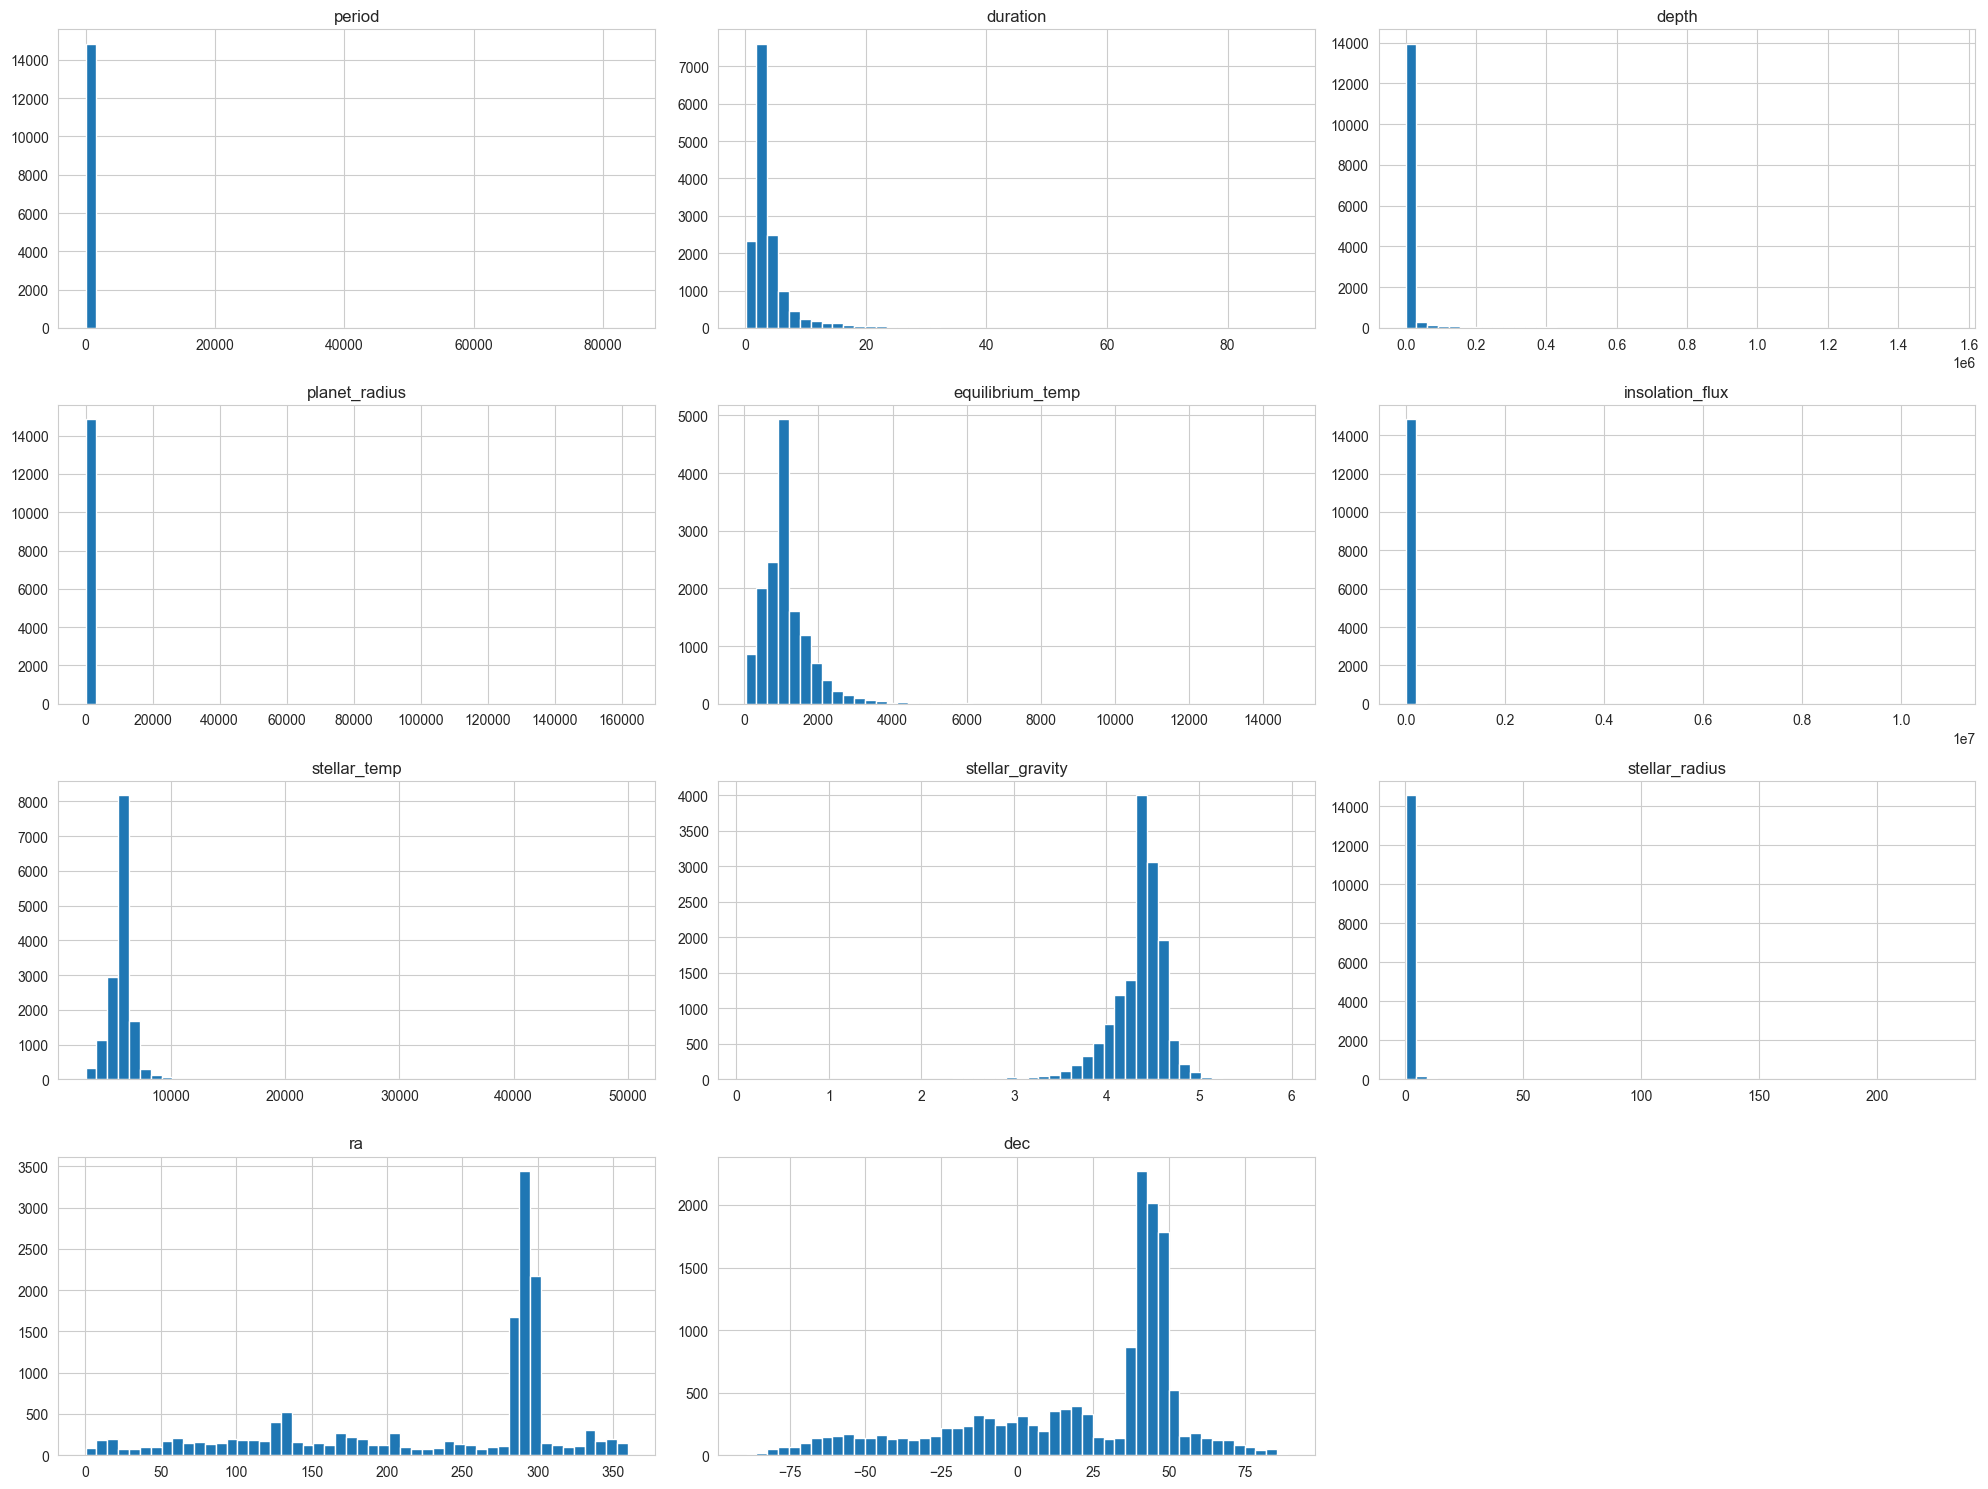

In [11]:
# We'll load the training data to perform the checks
# This avoids any information leakage from the validation or test sets
train_df = pd.read_csv('../unified_train.csv')

# --- Statistical Verification ---
print("--- Statistical Summary of the Training Data ---")
# Using .T to transpose the output for easier reading
display(train_df.describe().T)


# --- Visual Verification ---
print("\n\n--- Visual Distribution of Features ---")
# Plotting histograms for all features to spot anomalies
# We'll exclude the binary flag columns as their histograms are simple
features_to_plot = train_df.columns.drop(['disposition', 'fpflag_nt', 'fpflag_ss', 'fpflag_co', 'fpflag_ec'])
train_df[features_to_plot].hist(figsize=(20, 15), bins=50)
plt.tight_layout()
plt.show()

--- Reloading original datasets for wide feature analysis ---
Created a wide dataset with 145 total features for analysis.


C:\Users\yvcha\.pyenv\pyenv-win\versions\3.12.4\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['koi_teq_err1' 'koi_teq_err2']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(



Training a RandomForest model to determine feature importances...
Model training complete.


C:\Users\yvcha\AppData\Local\Temp\ipykernel_4960\668728866.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df.head(25), palette='viridis')


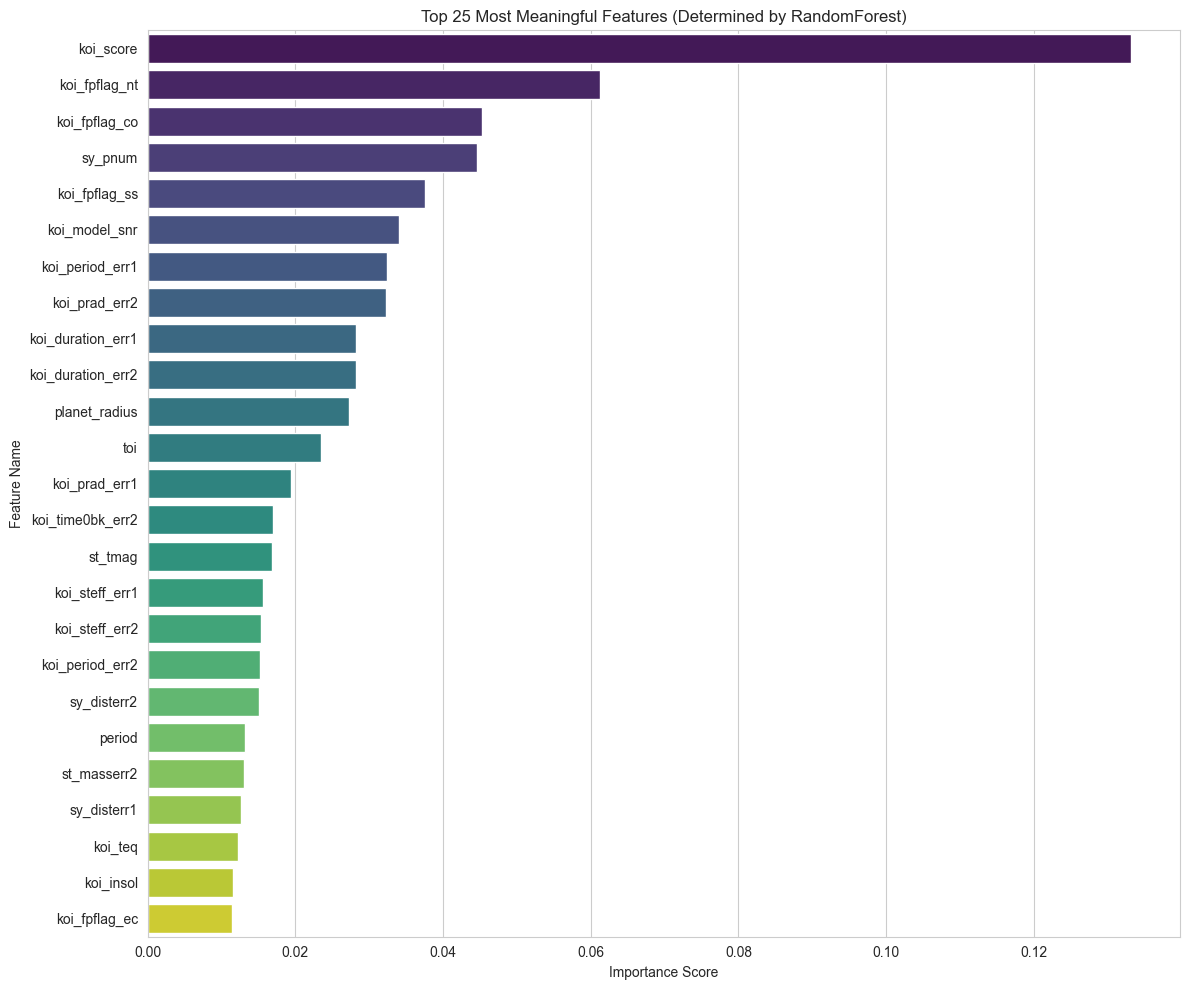

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Reload and prepare data (same as before) ---
print("--- Reloading original datasets for wide feature analysis ---")
data_path = '../data/'
df_koi = pd.read_csv(f'{data_path}KOI.csv', comment='#')
df_toi = pd.read_csv(f'{data_path}TOI.csv', comment='#')
df_k2 = pd.read_csv(f'{data_path}K2.csv', comment='#')

koi_map_multiclass = {'CONFIRMED': 'CONFIRMED', 'CANDIDATE': 'CANDIDATE', 'FALSE POSITIVE': 'FALSE POSITIVE'}
toi_map_multiclass = {'CP': 'CONFIRMED', 'KP': 'CONFIRMED', 'PC': 'CANDIDATE', 'APC': 'CANDIDATE', 'FP': 'FALSE POSITIVE', 'FA': 'FALSE POSITIVE'}
k2_map_multiclass = {'CONFIRMED': 'CONFIRMED', 'CANDIDATE': 'CANDIDATE', 'FALSE POSITIVE': 'FALSE POSITIVE', 'REFUTED': 'FALSE POSITIVE'}

df_koi['disposition'] = df_koi['koi_disposition'].map(koi_map_multiclass)
df_toi['disposition'] = df_toi['tfopwg_disp'].map(toi_map_multiclass)
df_k2['disposition'] = df_k2['disposition'].map(k2_map_multiclass)

koi_rename_map = {'koi_period': 'period', 'koi_prad': 'planet_radius', 'koi_srad': 'stellar_radius', 'koi_steff': 'stellar_temp'}
toi_rename_map = {'pl_orbper': 'period', 'pl_rade': 'planet_radius', 'st_rad': 'stellar_radius', 'st_teff': 'stellar_temp'}
k2_rename_map = {'pl_orbper': 'period', 'pl_rade': 'planet_radius', 'st_rad': 'stellar_radius', 'st_teff': 'stellar_temp'}
df_koi.rename(columns=koi_rename_map, inplace=True)
df_toi.rename(columns=toi_rename_map, inplace=True)
df_k2.rename(columns=k2_rename_map, inplace=True)

all_dfs = [df_koi, df_toi, df_k2]
numerical_dfs = []
for df in all_dfs:
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num = df.select_dtypes(include=numerics)
    df_num['disposition'] = df['disposition']
    numerical_dfs.append(df_num)

df_wide = pd.concat(numerical_dfs, ignore_index=True)
df_wide.dropna(subset=['disposition'], inplace=True)

print(f"Created a wide dataset with {df_wide.shape[1]} total features for analysis.")

# --- Step 2: Prepare data for the model ---
X_wide = df_wide.drop('disposition', axis=1)
y_wide = df_wide['disposition']

imputer = SimpleImputer(strategy='median')
X_wide_imputed = imputer.fit_transform(X_wide)

# --- Step 3: Train a RandomForest model ---
print("\nTraining a RandomForest model to determine feature importances...")
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_wide_imputed, y_wide)
print("Model training complete.")

# --- Step 4: Extract and visualize the results (CORRECTED) ---
importances = rf_model.feature_importances_
# ** THE FIX IS HERE **
# Get the feature names *from the imputer* to ensure the lengths match
feature_names = imputer.get_feature_names_out() 
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)

# Plot the top 25 most important features
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=importance_df.head(25), palette='viridis')
plt.title('Top 25 Most Meaningful Features (Determined by RandomForest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

# Choose any one of the final files to inspect. Let's use the training set.
file_path = 'data/processed/unified_train.csv'

try:
    # Load the CSV file into a Pandas DataFrame
    df = pd.read_csv(file_path)

    # Get the column names
    column_names = df.columns

    # Print the column names as a list for easy reading
    print("The columns in the final dataset are:")
    print(list(column_names))

except FileNotFoundError:
    print(f"Error: The file was not found at '{file_path}'.")
    print("Please ensure you have run the data processing and partitioning scripts from the plan first.")

Error: The file was not found at 'data/processed/unified_train.csv'.
Please ensure you have run the data processing and partitioning scripts from the plan first.
